# HR Employee Attrition

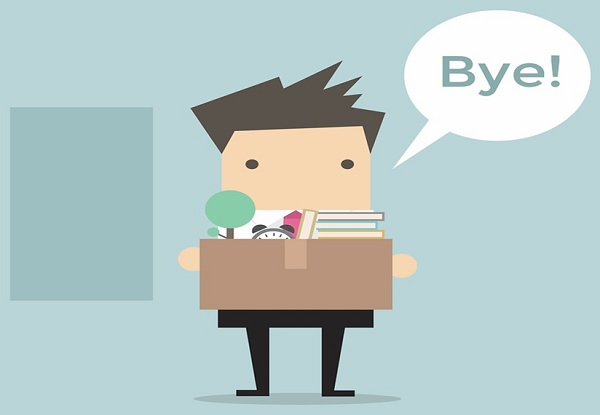

# An Introduction

***Definition*** HR analytics is the process of collecting and analyzing Human Resource (HR) data in order to improve an organization’s workforce performance. The process can also be referred to as talent analytics, people analytics, or even workforce analytics. This method of data analysis takes data that is routinely collected by HR and correlates it to HR and organizational objectives. Doing so provides measured evidence of how HR initiatives are contributing to the organization’s goals and strategies.

Definition HR analytics is the process of collecting and analyzing Human Resource (HR) data in order to improve an organization’s workforce performance. The process can also be referred to as talent analytics, people analytics, or even workforce analytics. This method of data analysis takes data that is routinely collected by HR and correlates it to HR and organizational objectives. Doing so provides measured evidence of how HR initiatives are contributing to the organization’s goals and strategies.

***Problem Statement***

Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as possibly planning new hiring in advance. I will be usign a step-by-step systematic approach using a method that could be used for a variety of ML problems. This project would fall under what is commonly known as "HR Anlytics", "People Analytics".


***Need of HR Analytics*** Most organizations already have data that is routinely collected, so why the need for a specialized form of analytics? Can HR not simply look at the data they already have? Unfortunately, raw data on its own cannot actually provide any useful insight. It would be like looking at a large spreadsheet full of numbers and words. Once organized, compared and analyzed, this raw data provides useful insight.They can help answer questions like:

***-*** What patterns can be revealed in employee turnover?

***-*** How long does it take to hire employees?

***-*** What amount of investment is needed to get employees up to a fully productive speed?

***-*** Which of our employees are most likely to leave within the year?

***-*** Are learning and development initiatives having an impact on employee performance?


***The process of HR Analytics***

HR Analytics is made up of several components that feed into each other.

To gain the problem-solving insights that HR Analytics promises, data must first be collected.
The data then needs to be monitored and measured against other data, such as historical information, norms or averages.
This helps identify trends or patterns. It is at this point that the results can be analyzed at the analytical stage.
The final step is to apply insight to organizational decisions.


So lets start with our analysis!!!

## Importing the Libraries

In [87]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")


# Importing the dataset

In [88]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [89]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Taking a glance at the datatypes

In [90]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Taking a glance at the null values in the data

In [91]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Analysis

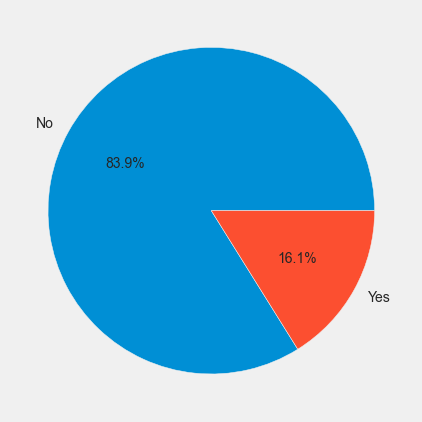

In [92]:
plt.figure(figsize=(7,7))
values=data['Attrition'].value_counts().values
labels=data['Attrition'].value_counts().index
plt.pie(values,labels= labels, autopct='%1.1f%%')
plt.show()

Note that the number of observations belonging to the 'No' category is way greater than that belonging to 'Yes' category. Hence we have skewed classes and this is a typical example of the 'Imbalanced Classification Problem'.

Many statistical techniques have been put forth to treat imbalances in data (oversampling or undersampling). In this notebook, I will use an oversampling technique known as SMOTETomek to treat this imbalance.

# How is attrition dependent on Age?

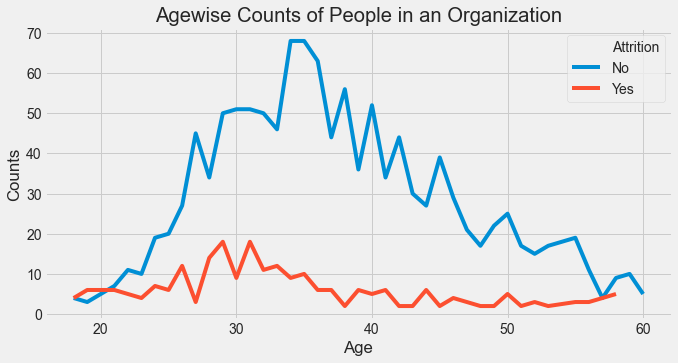

In [93]:
age_att=data.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
plt.figure(figsize=(10,5))
plt.title('Agewise Counts of People in an Organization')
sns.lineplot(x = 'Age', y = 'Counts',hue='Attrition', data=age_att)
plt.show()

***Observation*** As seen in the chart above, the attrition is maximum between the age groups 28-32. The attrition rate keeps on falling with increasing age, as people look after stability in their jobs at these point of times. Also at a very younger age, i.e. from 18-20, the chances of an employee leaving the organization is far more- since they are exploring at that point of time. It reaches a break even point at the age of 21

# Is income the main factor towards employee attrition?

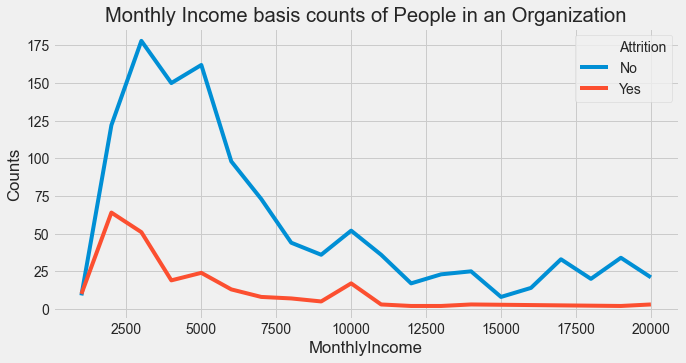

In [94]:
rate_att=data.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
plt.figure(figsize=(10,5))
plt.title('Monthly Income basis counts of People in an Organization')
sns.lineplot(x='MonthlyIncome',y='Counts',hue='Attrition', data=rate_att)
plt.show()

***Observation*** As seen in the above chart, the attrition rate is evidently high at very low income levels- less than 5k monthly. This decreases further- but a minor spike is noticed aorund 10k- indicating the middle class liveliood. They tend to shift towards a better standard of living, and hence move to a different job. When the monthly income is pretty decent, the chances of an employee leaving the organization is low- as seen by the flat line



# Does the Department of work impact attrition?

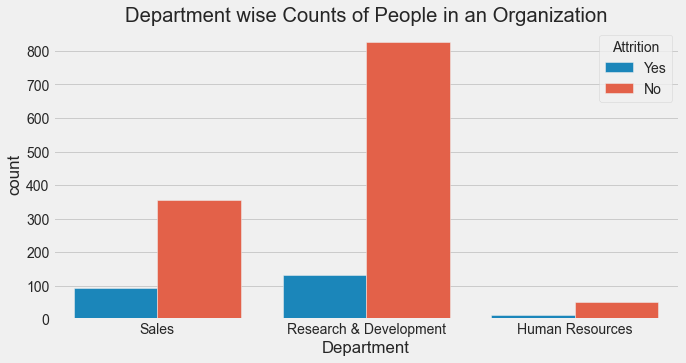

In [95]:
plt.figure(figsize=(10,5))
plt.title('Department wise Counts of People in an Organization')
sns.countplot(x=data['Department'],hue=data['Attrition'])
plt.show()

***Observations*** This data comprises of only 3 major departments- among which Sales department has the highest attrition rates (25.84%), followed by the Human Resource Department (19.05%). Research and Development has the least attrition rates, that suggests the stability and content of the department as can be seen from the chart above(13.83%).

# How does the environment satisfaction impact attrition?

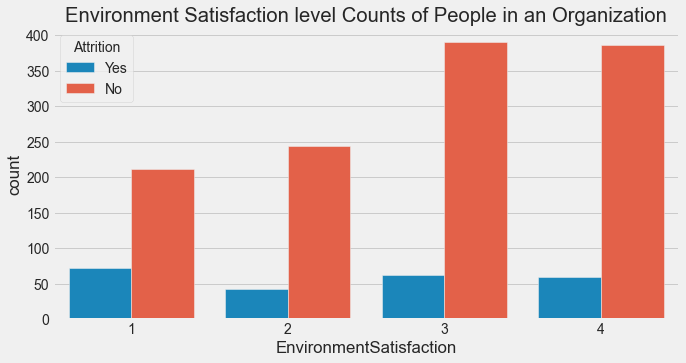

In [96]:
plt.figure(figsize=(10,5))
plt.title('Environment Satisfaction level Counts of People in an Organization')
sns.countplot(x=data['EnvironmentSatisfaction'],hue=data['Attrition'])
plt.show()

***Observation*** In the satisfaction Level 1-2, the chances of peope leaving the organization slightly decreases. This is indicative of the better hopes with which people stay in an organization. However, as we move from 2-3, people tend to move on to get better opportunities and experiences. The attrition rate is almost stagnant for the higher satisfaction levels.

# How does self Job Satisfaction impact the Attrition?

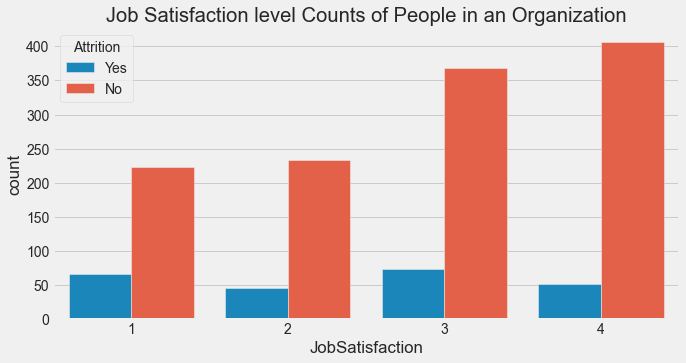

In [97]:
plt.figure(figsize=(10,5))
plt.title('Job Satisfaction level Counts of People in an Organization')
sns.countplot(x=data['JobSatisfaction'],hue=data['Attrition'])
plt.show()

***Observation*** With an increasing job satisfaction, the attrition rates decrease as can be seen in the chart above. Also from range 1-2 range we can infer (as seen above in Environment Satisfaction), the attrition level falls, but raises from 2-3, where the people tend to coose better opportunities.

# Does company stocks for employees impact attrition?

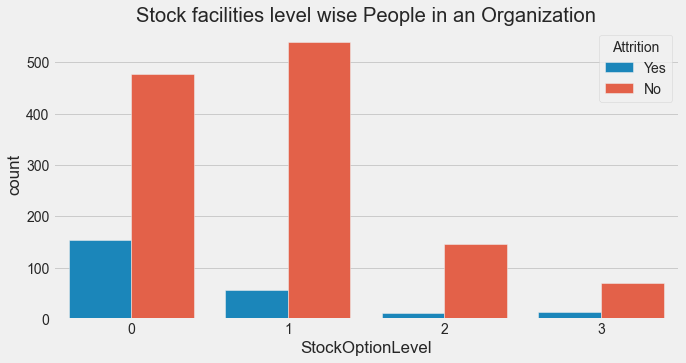

In [98]:
plt.figure(figsize=(10,5))
plt.title('Stock facilities level wise People in an Organization')
sns.countplot(x=data['StockOptionLevel'],hue=data['Attrition'])
plt.show()

***Observation*** The tendency of employees to leave the organization is much more when the stock availing options are limited. Since the stocks constitute to a huge amount of money while staying for a few years, people do not want to lose that opportunity. People with very limited/no stcok options have a freedom to leave the organization at will.



# How does Work Life Balance impact the overall attrition rates?

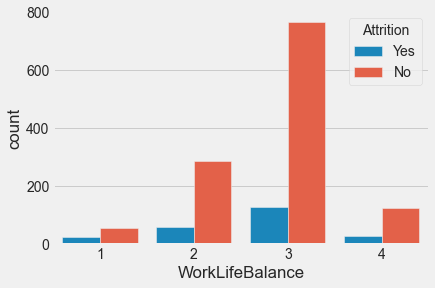

In [99]:
sns.countplot(x=data['WorkLifeBalance'],hue=data['Attrition'])

***Observation*** People with poor levels of Work life balance have adjusted themselves to their jobs, but as seen for the above parameters with a better work life score, people are more accustomed to the better life and want to go for an attrition more. But this trend perishes when the work life balance is really good, and people are satisfied with the work they are doing

# How does work experience affect attrition?


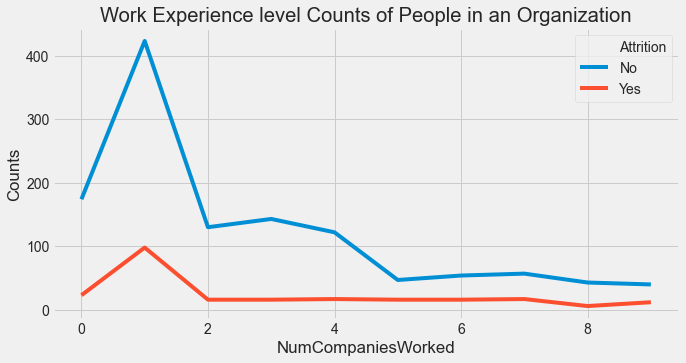

In [100]:
ncwrd_att=data.groupby(['NumCompaniesWorked','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')

plt.figure(figsize=(10,5))
plt.title('Work Experience level Counts of People in an Organization')
sns.lineplot(x='NumCompaniesWorked',y='Counts',hue='Attrition', data=ncwrd_att)
plt.show()

***Observations*** As seen from the chart above, clearly, employees who started their career with the company- or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company. People who have gained much experience- working in multiple companies tend to stay in the company they join.

# How does Work duration in current role impact Attrition?

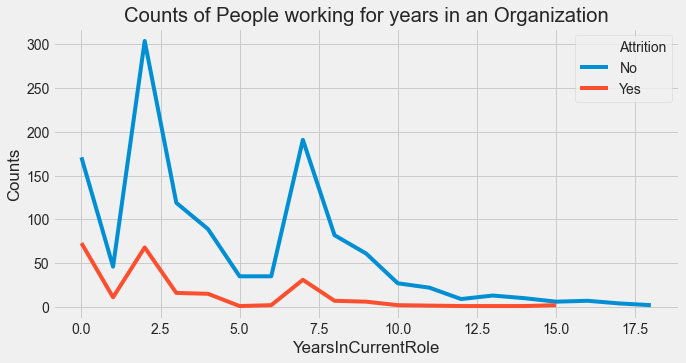

In [101]:
yrscr_att=data.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')


plt.figure(figsize=(10,5))
plt.title('Counts of People working for years in an Organization')
sns.lineplot(x='YearsInCurrentRole',y='Counts',hue='Attrition', data = yrscr_att)
plt.show()

***Observation*** We have seen people are more prone to leave the organization in the starting years on their role. When people are in the same role for a long period of time, they tend to stay longer for moving in an upward role.

# Does Hike percentage impact Attrition?

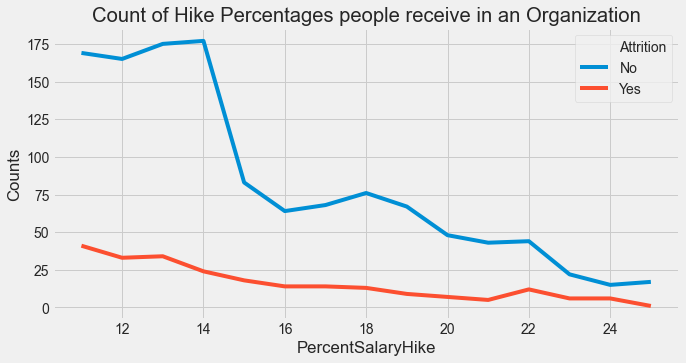

In [102]:
hike_att=data.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')


plt.figure(figsize=(10,5))
plt.title('Count of Hike Percentages people receive in an Organization')
sns.lineplot(x='PercentSalaryHike',y='Counts',hue='Attrition', data = hike_att)
plt.show()

***Observation*** Higher hikes motivate people to work better, and stay in the organization. Hence we see the chances of an employee leaving the organization where the hike is lower, is much more than a company that gives a good hike.



# Are managers a reason of people resigning??

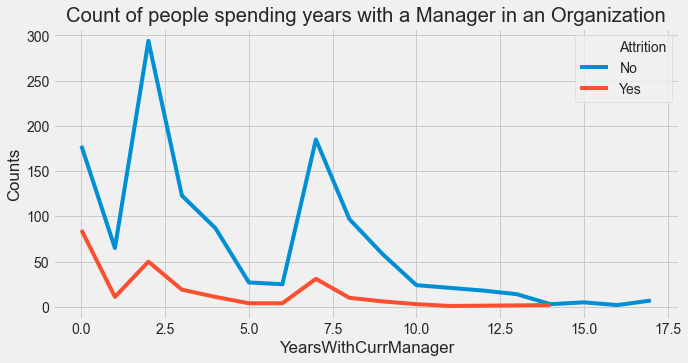

In [103]:
man_att=data.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')



plt.figure(figsize=(10,5))
plt.title('Count of people spending years with a Manager in an Organization')
sns.lineplot(x='YearsWithCurrManager',y='Counts',hue='Attrition', data = man_att)
plt.show()


***Observation*** We notice 3 major spikes in the attrition rate, when we are analyzing the relationship of an employee with their manager. At the very start, where the time spent with the manager is relatively less- people tend to leave their jobs- considering their relationship with their previous managers. At an average span of 2 years, when employees feel they need an improvement, they also tend to go for a change. When the time spent with the manager is slightly higher (about 7 years)- people tend to find their career progression stagnant, and tend to go for a change. But when the relative time spend with a manager is very high- people are satisfied with their work. Hence the chances of an employee resigning then is significantly low.

In [104]:
for column in data.columns:
    print(f"{column}: Number of unique values {data[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

We notice that 'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values. This features aren't useful for us, So we are going to drop those columns.

In [105]:
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

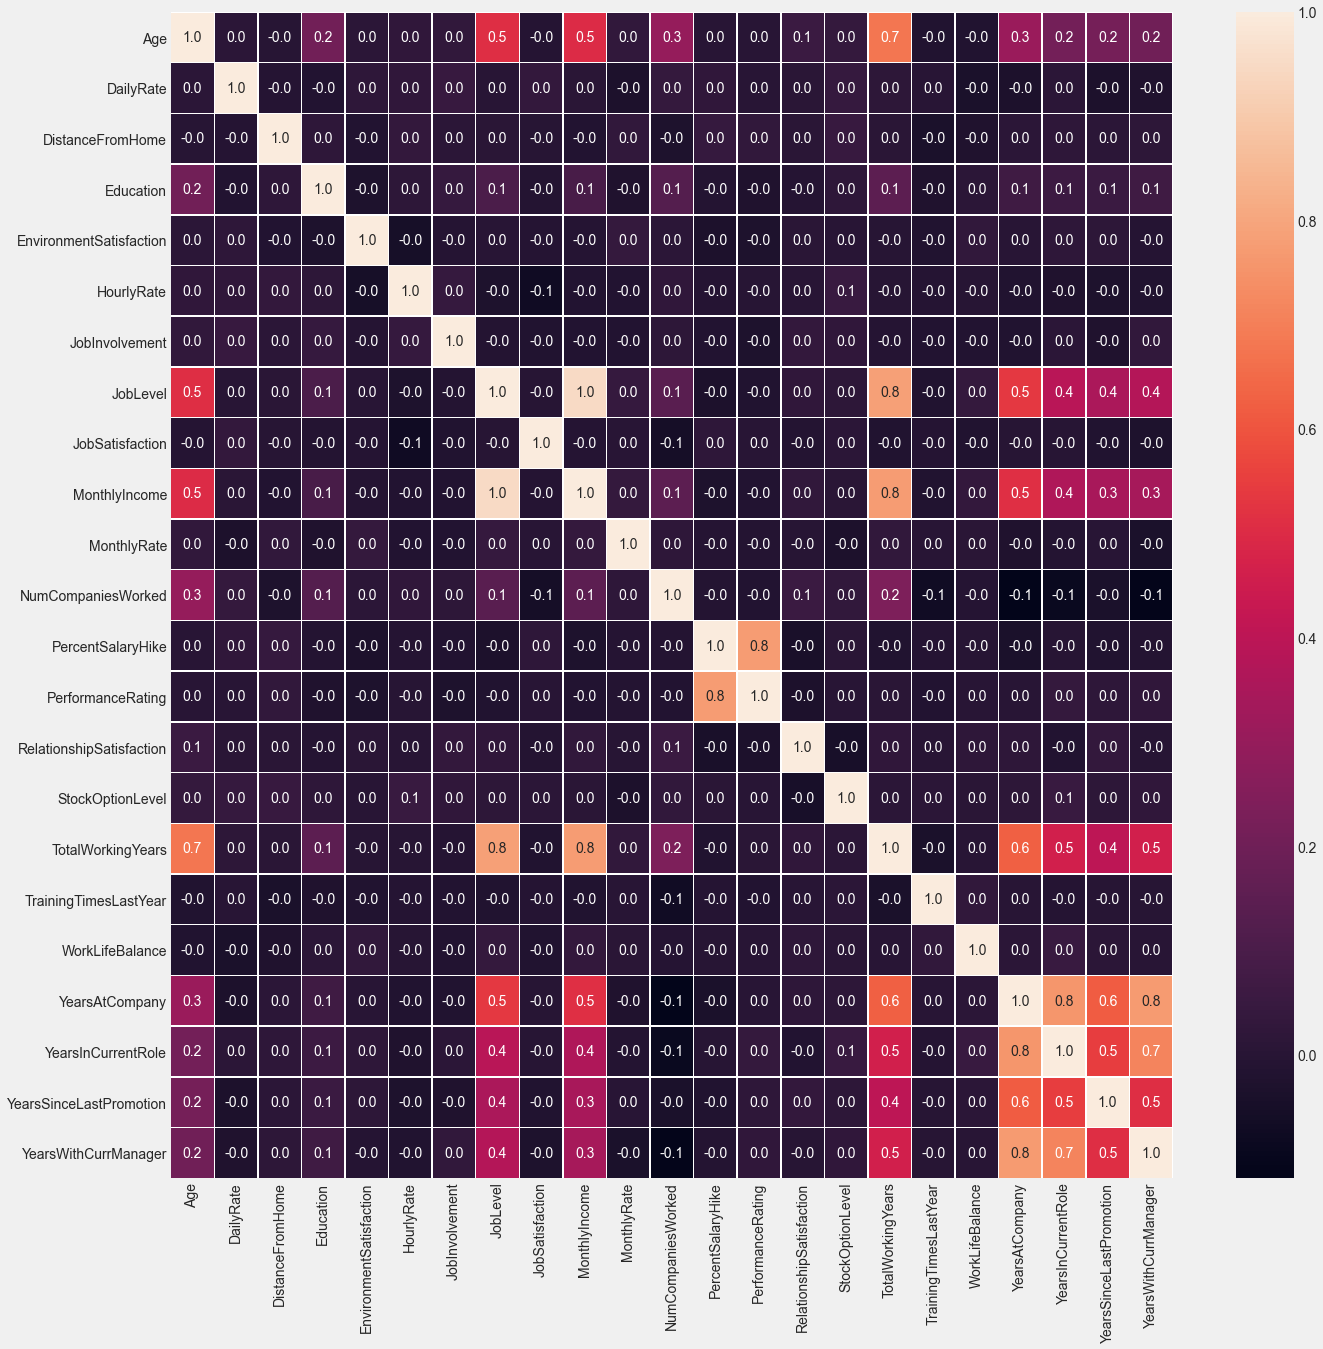

In [106]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Analysis of correlation results (sample analysis):


Job level is strongly correlated with total working years

Monthly income is strongly correlated with Job level

Monthly income is strongly correlated with total working year

Age is stongly correlated with monthly income


# Remove Skewness

***my medium blog where you get complete details about skewness***

https://vivekrai1011.medium.com/skewness-and-kurtosis-in-machine-learning-c19f79e2d7a5

In [107]:
data.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [108]:
numerical= data.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Numerical Features in Test Set: 23


In [109]:
for col in numerical:
    if data[col].skew()>0.55:
        data[col] = np.log1p(numerical[col])

# Outliers detection

***my medium blog where you get complete details about outliers***

https://vivekrai1011.medium.com/all-about-outlier-detction-techniques-4e7a803bd6

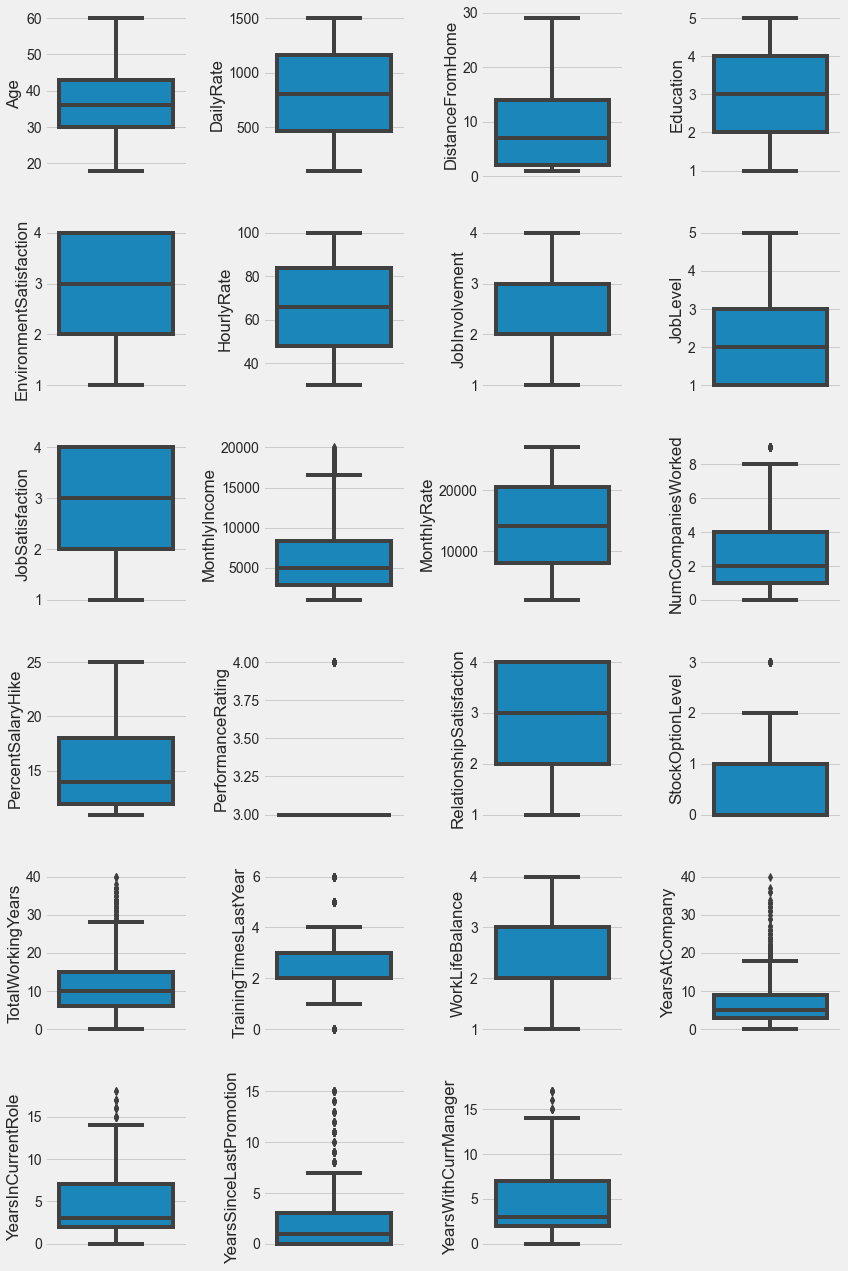

In [110]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical.columns)):
    fig.add_subplot(6,4,i+1)
    sns.boxplot(y=numerical.iloc[:,i])

plt.tight_layout()
plt.show()


In [111]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data["Attrition"] = LE.fit_transform(data.Attrition)
data["BusinessTravel"]=LE.fit_transform(data["BusinessTravel"])
data["Department"]=LE.fit_transform(data["Department"])
data["EducationField"]=LE.fit_transform(data["EducationField"])
data["Gender"]=LE.fit_transform(data["Gender"])
data["JobRole"]=LE.fit_transform(data["JobRole"])
data["MaritalStatus"]=LE.fit_transform(data["MaritalStatus"])
data["OverTime"]=LE.fit_transform(data["OverTime"])

# Remove Outliers

In [112]:
from scipy.stats import zscore
z_score=abs(zscore(data))
print("The shape of dataset before removing outliers",data.shape)
data=data.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",data.shape)

The shape of dataset before removing outliers (1470, 31)
The shape of dataset after removing outliers (1406, 31)


# Prepare dataset


***Define (X, y)***

In [113]:
X= data.drop(["Attrition"],axis=1)
y= data["Attrition"]

# Standardize, or Normalize
***StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.***

In [114]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X= scaler.fit_transform(X)

***Train test split***

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30)

# We use SMOTETomek for Handling Imbalanced

***my medium blog where you get complete details about imbalanced dataset***

https://vivekrai1011.medium.com/undersampling-and-oversampling-imbalanced-data-bf7e9405fcad

In [116]:
# Implementing Oversampling for Handling Imbalanced 
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_train_sm,y_train_sm =smk.fit_sample(X_train,y_train)

In [117]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_sm)))

Original dataset shape Counter({0: 839, 1: 145})
Resampled dataset shape Counter({1: 839, 0: 839})


# Machine learning algorithm for prediction

In [118]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC

In [119]:
# Model List
models = [] 
models.append(('LR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC())) 


In [120]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [121]:
results = [] 
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42) 
    cv_results = cross_val_score(model, X_train_sm, y_train_sm, cv=kfold, scoring='accuracy') 
    results.append(cv_results) 
    names.append(name) 
    print("Model Name:{} Model Acc:{:.3f} Model Std:{:.3f}".format(name, cv_results.mean(), cv_results.std()))

Model Name:LR Model Acc:0.756 Model Std:0.036
Model Name:DTC Model Acc:0.869 Model Std:0.065
Model Name:RF Model Acc:0.869 Model Std:0.071
Model Name:KNN Model Acc:0.789 Model Std:0.173
Model Name:SVM Model Acc:0.934 Model Std:0.033


In [122]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]} 

clf_grid = GridSearchCV(SVC(), param_grid, verbose=1,cv=10)

clf_grid.fit(X_train, y_train)
print("Best Parameters:\n", clf_grid.best_params_)
print('best score:', clf_grid.best_score_)


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameters:
 {'C': 100, 'gamma': 0.001}
best score: 0.8780869923727067


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   38.6s finished


In [123]:
SVM = SVC(C = 100,gamma = 0.001 ) 
SVM.fit(X_train,y_train)
print('Traning Model accruracy scores: {:.3f}'.format(SVM.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(SVM.score(X_test,y_test)))


Traning Model accruracy scores: 0.901
Test Model accruracy scores: 0.879


In [124]:
y_pred_sm = SVM.predict(X_test)

# Confusion Matrix

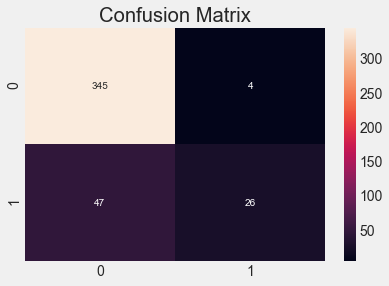

In [125]:
from sklearn.metrics import confusion_matrix
M_confusao = confusion_matrix(y_test, y_pred_sm)

# Confusion matrix plot
ax= plt.subplot()
sns.heatmap(M_confusao, annot=True, ax = ax, annot_kws={"size": 10},fmt=".0f");
ax.set_title('Confusion Matrix'); 
plt.grid(False)

In [126]:
# Classiﬁcation Report
from sklearn.metrics import classification_report 
report = classification_report(y_test, y_pred_sm) 
print(report)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       349
           1       0.87      0.36      0.50        73

    accuracy                           0.88       422
   macro avg       0.87      0.67      0.72       422
weighted avg       0.88      0.88      0.86       422



# Conclusions

We have checked the data, and have come upon to infer the following observations:

1) People are tending to switch to a different jobs at the start of their careers, or at the earlier parts of it. Once they have    settled with a family or have found stability in their jobs, they tend to stay long in the same organization- only going for
   vertical movements in the same organization.

2) Salary and stock ptions have a great motivation on the employees and people tend to leave the organization much lesser.Higher    pay and more stock options have seen more employees remain loyal to their company.

3) Work life balance is a great motivation factor for the employees. However, people with a good work-life balance, tend to
   switch in search of better opportunities and a better standard of living.
   
4) Departments where target meeting performance is very much crucial (for e.g. Sales) tend to have a greater chances of leaving
   the organization as compared to departments with more administration perspective (For e.g. Human Resources)
   
5) People with a good Job Satisfaction and Environment satisfaction are loyal to the organization- and this speaks loud for any
   Organization. However, people who are not much satisfied with their current project- tend to leave the organization far more.     

***Strategic Retention Plan***

•	The stronger indicators of people leaving include:

	Monthly Income: people on higher wages are less likely to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages.

	Over Time: people who work overtime are more likelty to leave the company. Hence efforts must be taken to appropriately scope projects upfront with adequate support and manpower so as to reduce the use of overtime.

	YearsWithCurrManager: A large number of leavers leave 6 months after their Current Managers. By using Line Manager details for each employee, one can determine which Manager have experienced the largest numbers of employees resigning over the past year. Several metrics can be used here to determine whether action should be taken with a Line Manager:

o	number of employees under managers showing high turnover rates: this would indicate that the organisation's structure may need to be revisit to improve efficiency

o	number of years the Line Manager has been in a particular position: this may indicate that the employees may need management training or be assigned a mentor (ideally an Executive) in the organisation

o	patterns in the employees who have resigned: this may indicate recurring patterns in employees leaving in which case action may be taken accordingly.

	Age: Employees in relatively young age bracket 25-35 are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.

	DistanceFromHome: Employees who live further from home are more likely to leave the company. Hence, efforts should be made to provide support in the form of company transportation for clusters of employees leaving the same area, or in the form of Transportation Allowance. Initial screening of employees based on their home location is probably not recommended as it would be regarded as a form of discrimination as long as employees make it to work on time every day.

	TotalWorkingYears: The more experienced employees are less likely to leave. Employees who have between 5-8 years of experience should be identified as potentially having a higher-risk of leaving.

	YearsAtCompany: Loyal companies are less likely to leave. Employees who hit their two-year anniversary should be identified as potentially having a higher-risk of leaving.

A strategic "Retention Plan" should be drawn for each Risk Category group. In addition to the suggested steps for each feature listed above, face-to-face meetings between a HR representative and employees can be initiated for medium- and high-risk employees to discuss work conditions. Also, a meeting with those employee's Line Manager would allow to discuss the work environment within the team and whether steps can be taken to improve it.

